# Predict the safety of the car (unacceptable, acceptable,good , very good) with Decision Tree, Random Forest

### Problem Statement

A car dealership and manufacturing company wants to develop a predictive model to automatically evaluate the safety level of 

vehicles based on their key attributes.

Currently, safety assessments require expensive crash tests and expert evaluations, which are time-consuming and resource-intensive.

### Business Impact

The inability to quickly and accurately assess vehicle safety leads to:

Increased costs from extensive physical testing

Slower time-to-market for new vehicle models

Inconsistent safety evaluations due to subjective human judgment

Missed opportunities to optimize vehicle designs for safety early in development

HERE  we build a Decision Tree Classifier to predict the safety of the car. We build two models, one with criterion `gini index` 

and another one with criterion `entropy`. Implemention Decision Tree Classification with Python and Scikit-Learn. 

#  Import libraries 

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('car_evaluation.csv', header=None)
data = pd.read_csv('car_evaluation.csv')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.shape

(1728, 7)

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [11]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

### let's again preview the dataset

In [12]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [15]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts())   


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


### Summary of variables
- There are 7 variables in the dataset. All the variables are of categorical data type.
- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.
- `class` is the target variable.

In [16]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

The `class` target variable is ordinal in nature.

In [18]:
# check missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Declare feature vector and target variable

In [19]:
X = df.drop(['class'], axis = 1) # 1 means column
y = df['class']

In [20]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [21]:
y.value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

### Split data into separate training and test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [23]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [24]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [25]:
y_train.shape, y_test.shape

((1157,), (571,))

In [26]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [27]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [28]:
 !pip install category-encoders

In [31]:
# import category encoders
import category_encoders as ce

In [32]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [33]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [34]:
X_train = encoder.fit_transform(X_train)
# (e.g., "vhigh"→1, "high"→2 for the 'buying' column)

In [35]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [36]:
X_test = encoder.transform(X_test)

In [44]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [37]:
X_train.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object

In [38]:
y_train.head()

48      unacc
468     unacc
155     unacc
1721     good
1208    unacc
Name: class, dtype: object

We now have training and test set ready for model building. 

###  Decision Tree Classifier with criterion gini index

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state = 0)
# max_depth=3: Limits tree depth to prevent overfitting

In [42]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index

In [43]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [44]:
from sklearn.metrics import accuracy_score
print('Model accuracy with  gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy with  gini index: 0.8021


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Let us  compare the train-set and test-set accuracy to check for overfitting.

In [45]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [46]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


### Check for overfitting and underfitting

In [47]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


### Visualize decision-trees

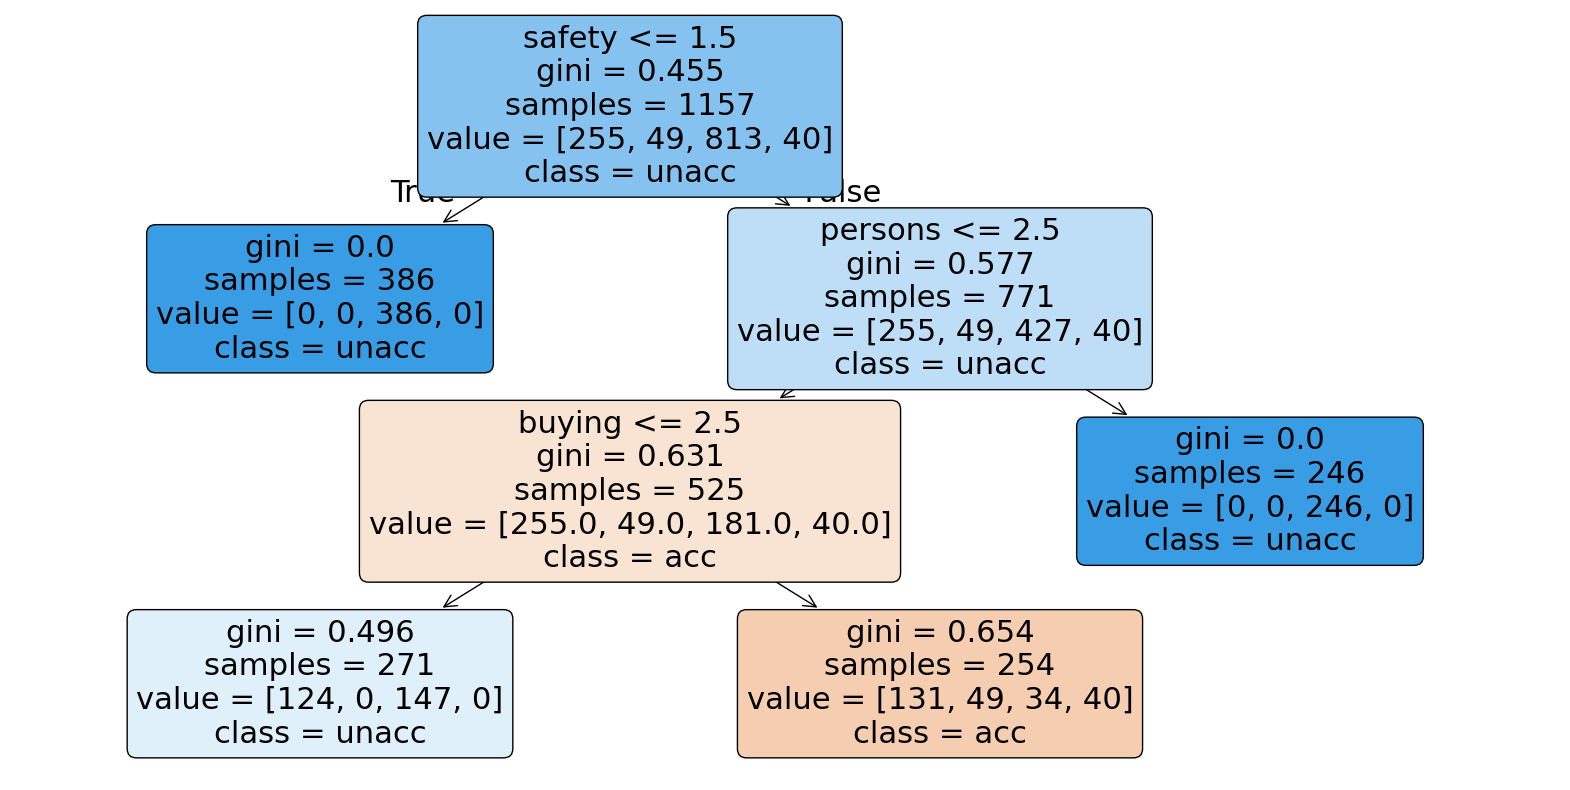

In [50]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf_gini, feature_names=X.columns, class_names=clf_gini.classes_, filled=True, rounded=True)
plt.show()

In [51]:
# Class Order Mapping:
# Index 0: 'acc' (acceptable) → 124 samples

# Index 1: 'good' → 0 samples

# Index 2: 'unacc' (unacceptable) → 147 samples (majority class)

# Index 3: 'vgood' (very good) → 0 samples

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


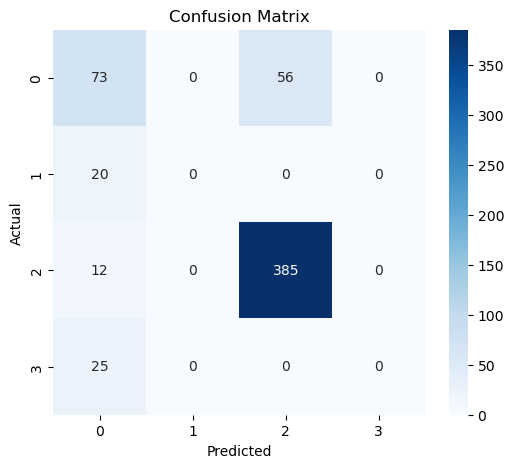

In [65]:
from sklearn.metrics import confusion_matrix, classification_report

cm_g = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm_g)
plt.figure(figsize=(6,5))
sns.heatmap(cm_g, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [66]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



# Decision Tree Classifier with criterion entropy

In [52]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [53]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [82]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8021


### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [55]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [56]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7865


### Check for overfitting and underfitting

In [57]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


### Visualize decision-trees

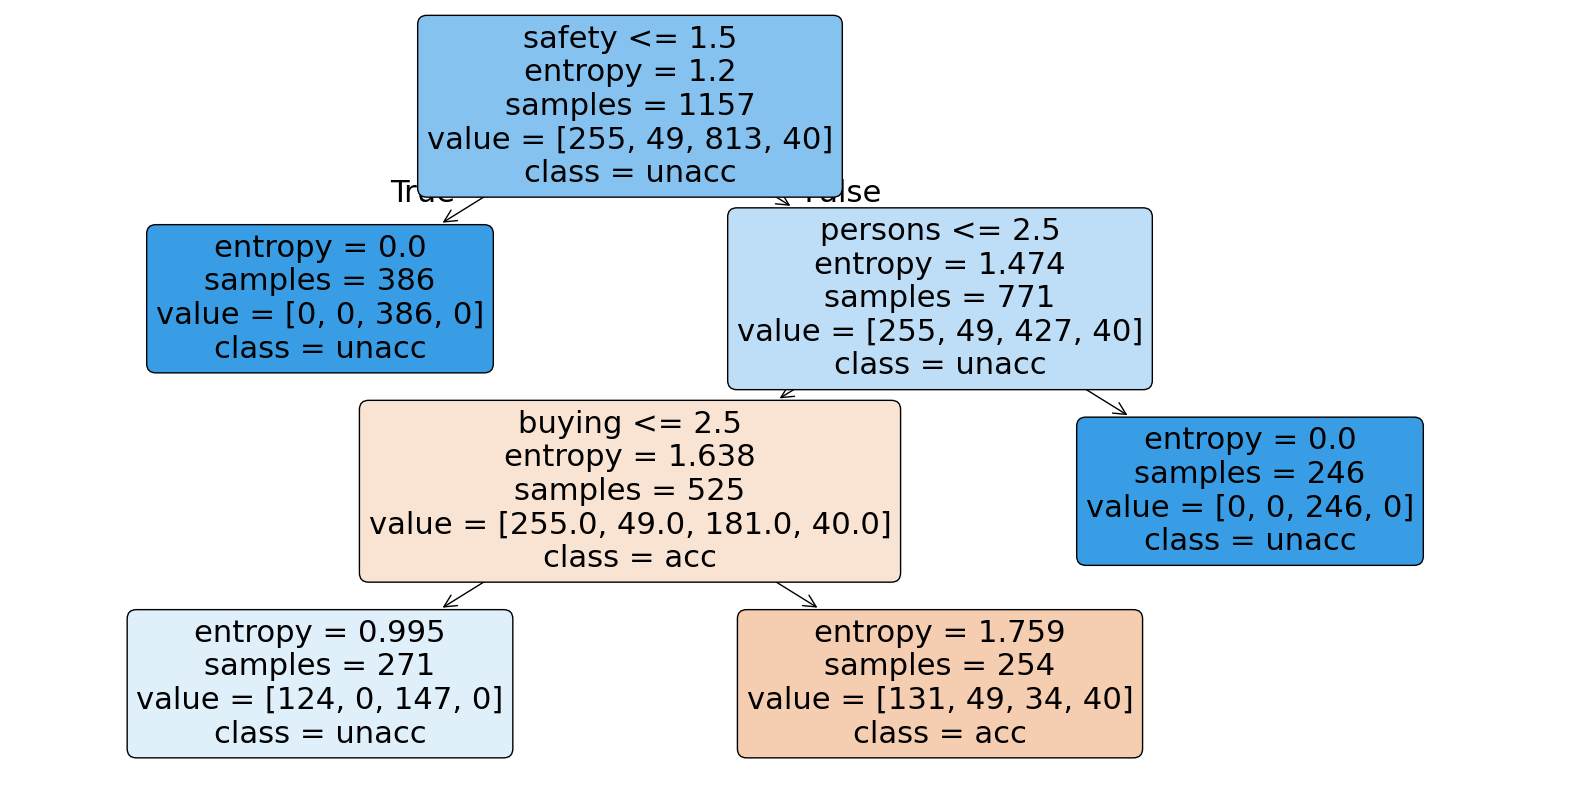

In [59]:
from sklearn.tree import  plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf_en.fit(X_train, y_train), 
          feature_names=X.columns,  # This shows column names instead of indices
          class_names=clf_en.classes_,  # Shows class names if available
          filled=True,              # Colors the nodes
          rounded=True)             # Rounds the node corners
plt.show()

### Model Evaluation

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


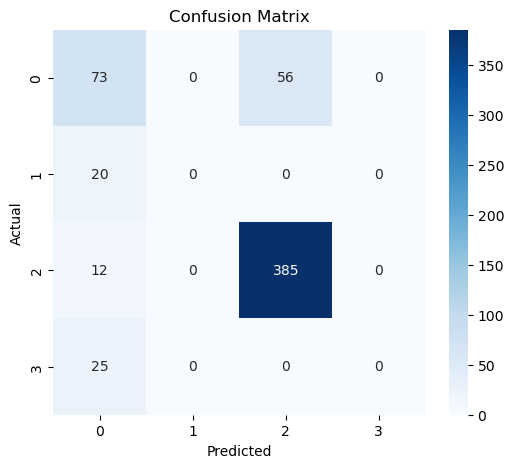

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [64]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



# Random Forest

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



In [68]:
from sklearn.ensemble import RandomForestClassifier

🔴 Model struggles with minority classes (good, vgood)

🟢 Excels at 'unacc' (majority class - 97% recall)

⚠️ 0% scores mean no correct predictions for that class

🤖 Weighted avg (80%) matters most for imbalanced data

In [78]:
rf_base = RandomForestClassifier(n_estimators = 100, max_depth = None, max_features = 'sqrt', random_state = 42)


In [79]:
rf_base.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 Summary of Model Performance
 
✅ What’s working:

The model excels at identifying "unacc" (unacceptable) cars:

97% recall: Captures almost all unsafe cars (critical for safety screening)

87% precision: When it predicts "unacc", it’s usually correct

⚠️ Key Limitations:

Fails on rare classes:

"good" and "vgood" predictions are 0% accurate

Due to very few samples (20 and 25 in test set)

### Predict the Test set 

📈 Recommended Actions:

For immediate use: Deploy for filtering unsafe cars only (high reliability on "unacc")

Improvement options:

Collect more data for rare classes ("good"/"vgood")

Use techniques like class weighting or oversampling

In [81]:
y_pred_rf = rf_base.predict(X_test)

### Check accuracy

In [83]:
print('Model accuracy score Random Forest: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)))

Model accuracy score Random Forest: 0.9422


### Model Evaluation

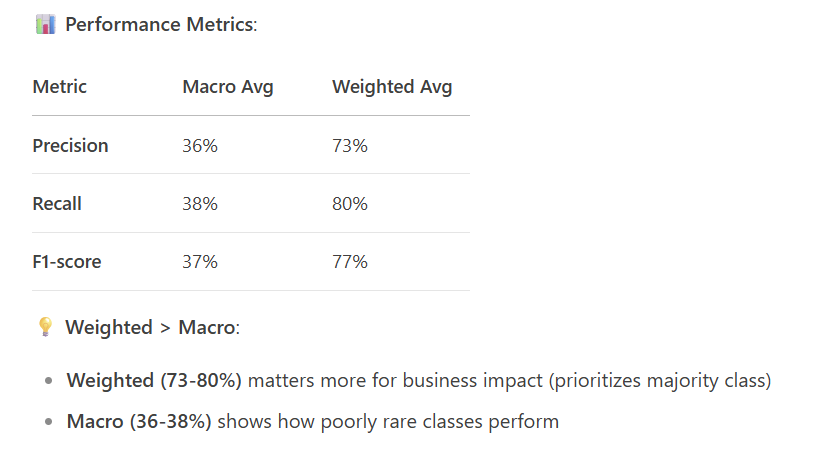

Confusion matrix

 [[113  10   4   2]
 [  2  17   0   1]
 [  8   0 389   0]
 [  3   3   0  19]]


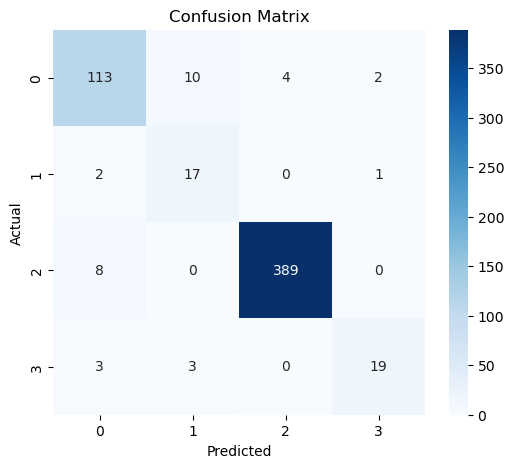

In [85]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

print('Confusion matrix\n\n', cm_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [86]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         acc       0.90      0.88      0.89       129
        good       0.57      0.85      0.68        20
       unacc       0.99      0.98      0.98       397
       vgood       0.86      0.76      0.81        25

    accuracy                           0.94       571
   macro avg       0.83      0.87      0.84       571
weighted avg       0.95      0.94      0.94       571



#  Results and conclusion  


1.	In Decision Tree model with criterion gini index and entropy, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

2.	Using Random Forest it gives us the better test-set accuracy of 0.94 also random forest predicted the 'good' and 'vgood' class which Desicion Tree missed.
